# Numerical Ordinary Differential Equations and Applications


## Computer Assignment: ODE Models of Disease 

### Name: Regan Hwang (s1910239)
D. J. Higham and H. Yorston, 
School of Mathematics, University of Edinburgh, January 2024


In this computer assignment we investigate disease models. 

This template Jupyter notebook sets the **four tasks** that make up the assignment.  

In order to complete the assignment, you must perform the four tasks by adding content to **this notebook**. The tasks involve solving ODE systems that have parameters. You did something similar in the Practice Computer Assignment, and you are encouraged to use the **same coding structure** for this assignment. Because you are now familiar with this type of task, **the coding boxes do not contain any Python code**; you must fill everything in. 
Include **comments** in your code, at a similar level to those appearing in the Practice Assignment. 

Any figure that you produce should have labeled axes, a title, and, where appropriate, a legend to distinguish between plots. 

To submit your completed work
  (a) create a pdf version of the notebook when all cells have been run,
  (b) submit **both the .ipynb and .pdf versions** electronically on **Learn**.
Hence, you are asked to submit two files: a Jupyter notebook and the corresponding pdf version. 
(On a Mac/Safari system I create a pdf via "File", "Print Preview" and "Export as PDF". Please **practice ahead of time** to make sure you can successfully create a pdf.) If there is any inconsistency between the pdf and ipynb files, we will regard the ipynb version as your definitive submission. Make sure that your name is clearly indicated at the top of notebook.

The deadline is **midday on Tuesday 27th February** and, as for all continuous assessment in this course, approved extensions and learning adjustments are permitted for 3 days each, while late submissions are not allowed. 
 

In the tasks below you are asked to model a disease outbreak and help prevent a zombie apocalypse.

In [1]:
# Import the required modules
import numpy as np                # scientific library
import matplotlib.pyplot as plt   # for creating plots
%matplotlib inline

### Background SIR Model

The mathematical modelling of infectious diseases is an important and well-studied area that is currently of particular interest. A simple, but seminal, idea in this field is the Susceptible, Infectious, Recovered (SIR) compartmental model of Kermack and McKendrick [1]; see also (https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology). In this model, the population splits into three disjoint compartments. At time $t$, we denote the number of  *susceptible* individuals by $S(t)$. These people do not have the disease, but are vulnerable to infection.  We let $I(t)$ denote the number of individuals who have the disease at time $t$; this is the *infected* category. Finallty, $R(t)$ denotes the number who have *recovered* from the disease, and are neither
vulnerable or infectious. This type of model is relevant for measles, mumps and rubella. The evolution of the three compartments can be modelled by an ODE of the form 
\begin{eqnarray*}
\frac{dS}{dt} &=& - \beta  SI \\
\frac{dI}{dt} &=& \beta S  I - \alpha  I\\
\frac{dR}{dt} &=& \alpha I.\\
\end{eqnarray*}

In this model, $\beta$  and $\alpha$ are nonnegative parameters. 
To justfy the model, we can argue that infection takes place when a susceptible individual intreracts with an infectious individual. Hence, the rate at which susceptible people become infected, $dS/dt$, is proportional to the current levels of both susceptible and infected people.
So $\beta$ quantifies the infectiousness of the disease, and 
$dS/dt = - \beta  SI$.
Similarly, the $\beta  SI$ expression affects $dI/dt$ positively, since a new infection event increases $I(t)$. 

We also assume that infected people recover at a rate determined by the constant $\alpha$.
So $dI/dt$ is affected negatively by $\alpha  I$ and 
$dR/dt$ is affected positively by $\alpha  I$.

[1] Kermack W.O., McKendrick A.G. 1927). "A Contribution to the Mathematical Theory of Epidemics". Proceedings of the Royal Society A. 115 (772): 700–721


# Task 1 
[6 marks]
Consider a measles outbreak. **We will measure time in units of days.**
Measles lasts for about $8$ days, so we will take $\alpha = 1/8$. 
The reproductive number, $\mathcal{R}_0$, is thought to be about 17 and $\mathcal{R}_0 = \beta/\alpha$, so we will take $\beta = 17/8$.<br>

Your initial task is to solve the SIR model above with these parameters.
Use the three stage RK3 method from the Practice Computer Assignment with a timestep of 6 hours.
We will work in terms of a normalized population and use initial conditions 
$S(t=0) = 0.99$, $R(t=0) = 0$ and $I(t=0) =0.01$ (so that the total population is $1$, and the solution components $S(t)$, $I(t)$ and $R(t)$ measure proportions).
Compute the solution components from $0$ to $30$ days and display the three components, $S(t)$, $I(t)$ and $R(t)$ in a single plot.  

In [2]:
def Runge_Kutta_3(f, times,y0, par):
    '''
    -Input-
    f: ODE to approximate
    times: Array containing time values for which approximations will be calculated
    y0: Array of initial values
    par: Array containing parameters
    -Output-
    Y: Array of arrays. Y[t] is an array containing approximations for time 't'.
    
    '''
    no_of_times = times.size                          # Number of time points
    no_of_eqns = y0.size                              # Number of equations
    Y = np.zeros((no_of_times, no_of_eqns))           # An array of zeros for storing the Y values for any number of eqns at 
                                                      # at each required time point
    
    Y[0,:] = y0                                       # The first values in the zero index of Y is set to array y0
    dt = times[1]-times[0]                            # Size of timestep
    for i in range(no_of_times-1):  
        delta1 = f(times[i],Y[i,:],par)* dt                                   # First stage variable
        delta2 = f(times[i] + 0.5 * dt,Y[i,:] + 0.5  * delta1, par)* dt       # Second stage variable
        delta3 = f( times[i] + dt, Y[i,:] -delta1 + 2.0 *  delta2, par) * dt  # Third stage variable
        
        Y[i+1,:] = Y[i,:] +  (delta1 + 4.0 * delta2 +  delta3 )/6.0  # Update row Y[i+1,:] based on calculations
    return Y  

In [3]:
# Checks if equations sum to the same value. Comments omitted since it's not part of the assessment.

def sum_check(Y):
    initial_sum = sum(Y[0])
    if (initial_sum>=0):
        lower_bound = initial_sum*0.99
        upper_bound = initial_sum*1.01
    else:
        upper_bound = initial_sum*0.99
        lower_bound = initial_sum*1.01
        
    for row in Y:
        current_sum = sum(row)
        if (current_sum<lower_bound or current_sum>upper_bound):
            return False
    return True

In [4]:
def SIR_model(t,y,par):
    '''
    -Input-
    t: Array of timesteps to be iterated over
    y: Array containing  [S, I, R] in that order
    par: Array containing values [alpha,beta] in that order
    -Output-
    Array containing [dS_dt, dI_dt, dR_dt] calculated based on 'y'. 
    '''
    [alpha, beta] = par            # Define alpha and beta
    [S, I, R] = y                  # Values for S, I, and R
    
    dS_dt = -beta*S*I              # Calculae dS_dt
    dI_dt = beta*S*I-alpha*I       # Calculae dI_dt
    dR_dt = alpha*I                # Calculae dR_dt
    
    return np.array([dS_dt, dI_dt, dR_dt])

In [5]:
iv1 = np.array([0.99,0.01,0])                # Array of initial values for S, I, R
t0 = 0.0                                     # Initial value of t
tf = 30.0                                    # Final value of t
h = 0.25                                     # Stepsize h. 6/24 days = 0.25 days
                    
T1 = np.arange(t0, tf+h, h)                  # Array that holds time values. 
                                             # The 2nd arg is tf+h so that tf is included in the array
par1 =[1/8, 17/8]                            # Array of parameters: alpha and beta
Y1= Runge_Kutta_3(SIR_model,T1, iv1, par1)   # Use Runge Kutta 3 and call the SIR model function with T1,iv1, and par1
assert(sum_check(Y1))                        # Check that S+I+R is constant

In [6]:
# For task 2.

max_timestep = 12;                         # Candidate value of the timestep with maximum infected individuals (Day3)
max_infected = Y1[12,1]                    # Proportion of infected people at that timestep
for t in range (12,21):                    # Loop through Day3 to Day5, as indicated in the hint
    if(Y1[t+1,1]>Y1[t,1]):                 # If there are more infected people at timestep t+1 than t...
        max_timestep = t+1                 # ...update values accordingly.
        max_infected = Y1[t+1,1]
max_time = T1[max_timestep]                # Convert timestep to actual time value

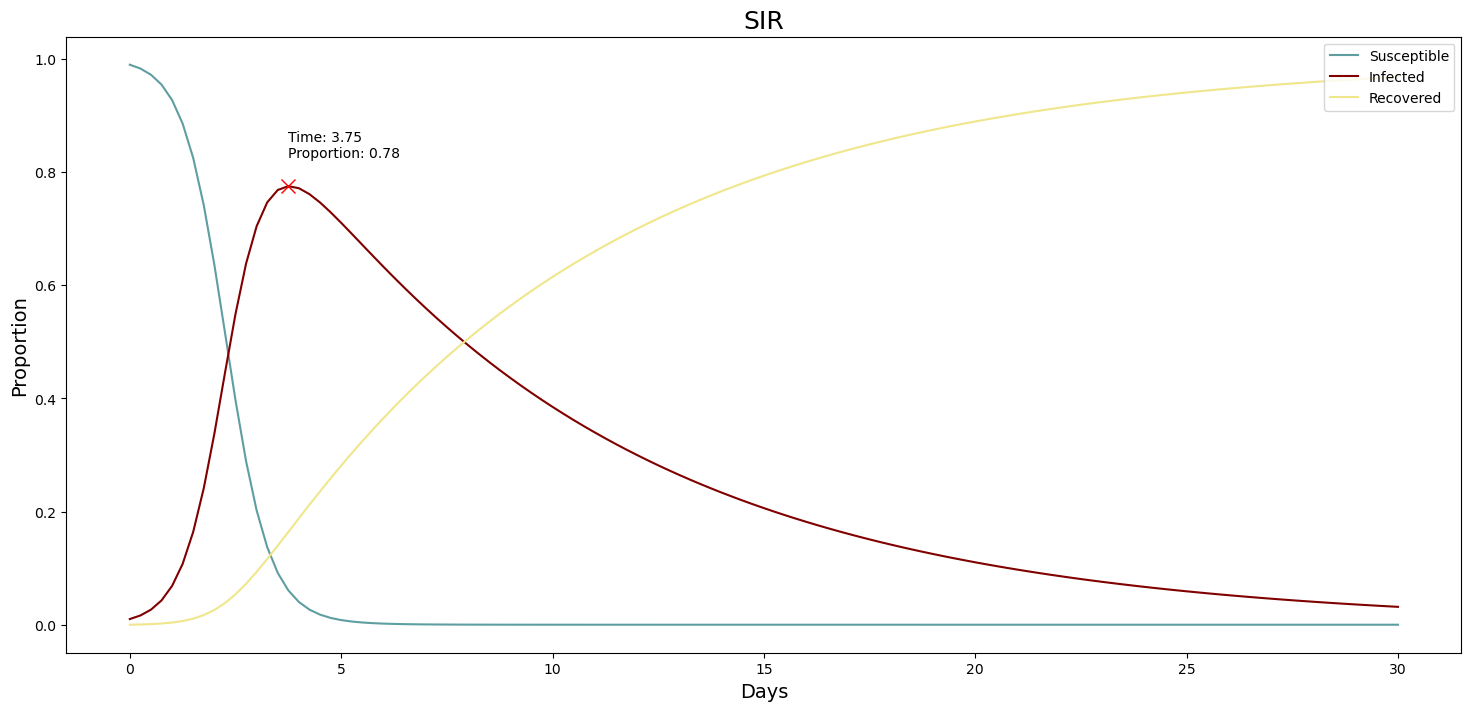

In [7]:
fig, ax = plt.subplots(1,1, figsize=(18, 8))                       # Set up one plot across the page
scheme = ['cadetblue', 'maroon', 'khaki']                          # Colour scheme for plots
labels= ['Susceptible','Infected','Recovered']                     # Labels for the plot

for i in range(3):                                                                # Loop over S,I, and R
    ax.plot(T1,Y1[:,i], color = scheme[i], markersize ='1' , label = labels[i])   # Plot S,I, and R against time.
    


ax.plot(max_time, max_infected, 'rx', markersize = '10')           # Mark the point with maximum I(t) with a red 'X'.    
ax.annotate(f'Time: {max_time} \nProportion: {round(max_infected,2)}', # Display the values of t and I(t) at that point
            xy=(max_time, max_infected), 
            xytext=(max_time, max_infected + 0.05)) 



ax.set_xlabel('Days', fontsize = '14')                             # Label the x-axis
ax.set_ylabel('Proportion',fontsize = '14')                        # Label the y-axis                                        
ax.set_title("SIR",fontsize = '18')                                # Plot title
ax.legend = plt.legend(loc ='upper right',  fontsize='medium')     # Add the legend
plt.show()                                                         # Show plot


# Task 2
[4 marks]
For your computation in Task 1, display
 (a) the maximum proportion of infected individuals [*hint: should be between 0.6 and 0.8*], and 
 (b) the time point (in days) in this numerical solution at which the maximum in (a) occurs [*hint: should be between 3 and 5*].
 
 Also, note in the SIR model that $dS/dt + dI/dt + dR/dt = 0$, so the sum $S(t) + I(t) + R(t)$ remains constant. Hence (c) give a plot to indicate whether the sum of the three components is constant over time for your computed solution.



In [8]:
print(f'The maximum proportion of infected individuals is {max_infected}. This occurs after {max_time} days.')

The maximum proportion of infected individuals is 0.7753379743562191. This occurs after 3.75 days.


In [9]:
sum_of_SIR = [sum(time_row) for time_row in Y1]
# A row in Y1 contains S,I,R for a certain timestep i.e. Y1[t] = [S(t), I(t), R(t)]
# Sum S+I+R for each timestep and store it in an array

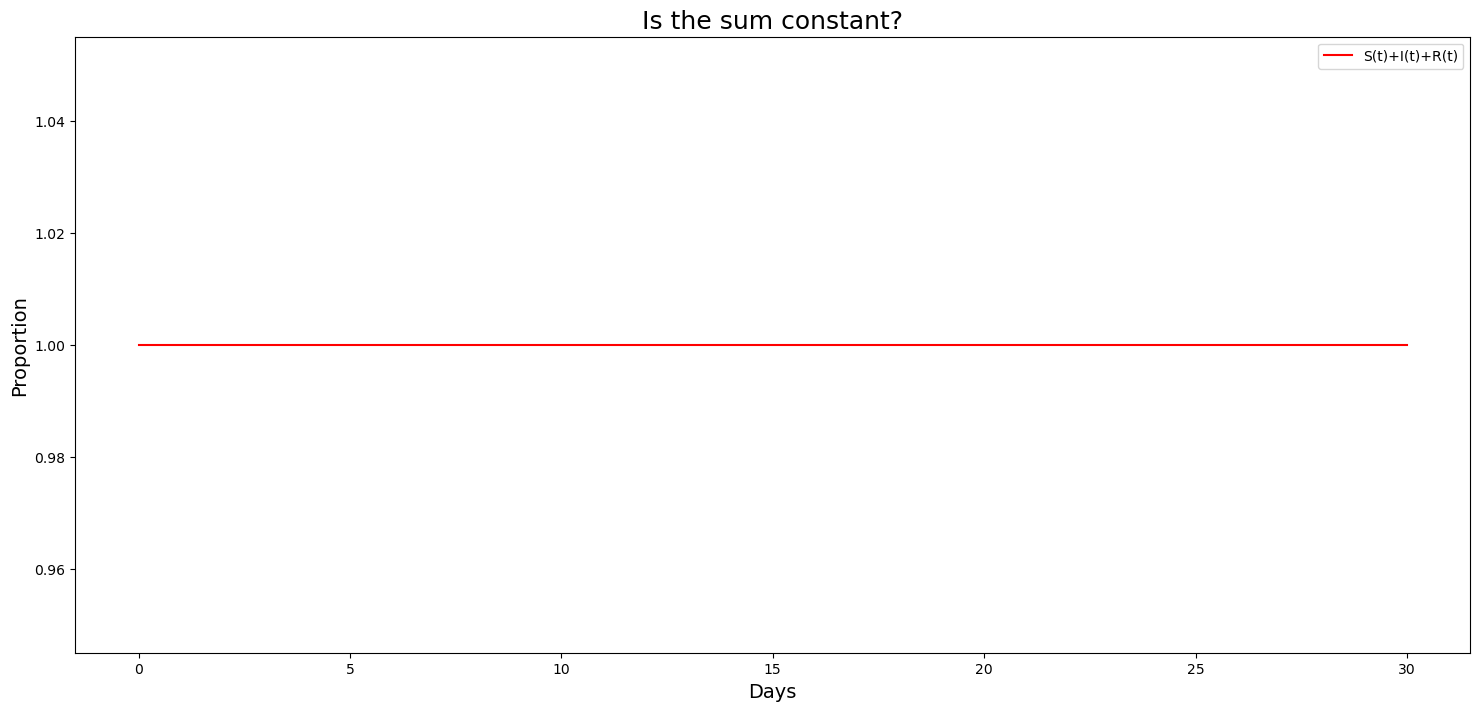

In [10]:
fig_1, ax_1 = plt.subplots(1,1, figsize=(18, 8))                        # Set up one plot across the page
ax_1.plot(T1,sum_of_SIR, color = "red", label = "S(t)+I(t)+R(t)")       # Plot S(t)+I(t)+R(t) against time

ax_1.set_xlabel('Days', fontsize = '14')                                # Label the x-axis
ax_1.set_ylabel('Proportion',fontsize = '14')                           # Label the y-axis
ax_1.set_title("Is the sum constant?",fontsize = '18')                  # Title
ax.legend = plt.legend(loc ='upper right',  fontsize='medium')          # Add Legend
plt.show()                                                              # Show plot

# Task 3
[5 marks]

The authors of [2] used an eye-catching science fiction setting to illustrate ODE disease modelling. They considered a population consisting of humans ($S(t)$), 
zombies ($Z(t)$), and 
removed zombies ($R(t)$) who may return to life as zombies. 
Here, it is assumed that zombies infect humans.
A zombie cannot be killed, but a plucky human may temporarily send a zombie into the removed class. The authors thus proposed the SZR zombie outbreak model
\begin{eqnarray*}
\frac{dS}{dt}&=&  -\beta SZ -\delta S \\
\frac{dZ}{dt}&=&  \beta SZ + \zeta R - \alpha SZ  \\
\frac{dR}{dt} &=& \alpha SZ + \delta S - \zeta R. \\
\end{eqnarray*}

We will model the circumstance where a group of zombies from Morningside sneak on board the University Shuttle Bus and invade the King's Buildings campus. 

We will now use absolute numbers of individuals, rather than proportions.

Using RK3 with a timestep of $0.1$ compute a solution to this ODE system in the case where 
$\alpha = 0.005$, $\beta = 0.0095$, $\eta = 0.05$ and $\delta = 0.01$.
Use initial conditions $S(t=0) = 500$, $Z(t=0) = 0.002$ and $R(t=0) = 1$ and display, on the same plot, the 
three components for $0 \le t \le 10$.


[2] P. Munz, I. Hudea, J. Imad and R.J. Smith? When zombies attack!: Mathematical modelling of an outbreak of zombie infection (Infectious Disease Modelling Research Progress 2009, in: J.M. Tchuenche and C. Chiyaka, eds, pp133-150).

In [11]:
def SZR_model(t,y,par):
    '''
    -Input-
    t: Array of timesteps to be iterated over.
    y: Array containing  [S, Z, R] in that order.
    par: Array containing [alpha, beta, eta, delta] in that order.
    -Output-
    Array containing [dS_dt, dZ_dt, dR_dt] calculated based on 'y'. 
    '''
    [alpha, beta, eta, delta] = par               # Define alpha, beta, eta, and delta
    [S,Z,R] = y                                   # Refer to each value in 'y' as S,Z,R
    
    dS_dt = -beta*S*Z - delta*S                   # Calculate dS_dt
    dZ_dt = beta*S*Z + eta*R -alpha*S*Z           # Calculate dZ_dt
    dR_dt = alpha*S*Z+ delta*S - eta*R            # Calculate dR_dt
    
    return np.array([dS_dt, dZ_dt, dR_dt])

In [12]:
T2 = np.arange(0,10.1,0.1)                        # Starting time: 0 / Finishing time: 10 / Stepsize: 0.1
iv2 = np.array([500,0.002,1])                     # Array containing initial values for S, Z, and R
par2 = [0.005, 0.0095, 0.05, 0.01]                # Array containg values for alpha, beta, eta, and delta
Y2 = Runge_Kutta_3(SZR_model,T2, iv2, par2)       # Use Runge Kutta 3 and call the SZR model function with T2,iv2, and par2
assert(sum_check(Y2))                             # Check that S+Z+R is constant

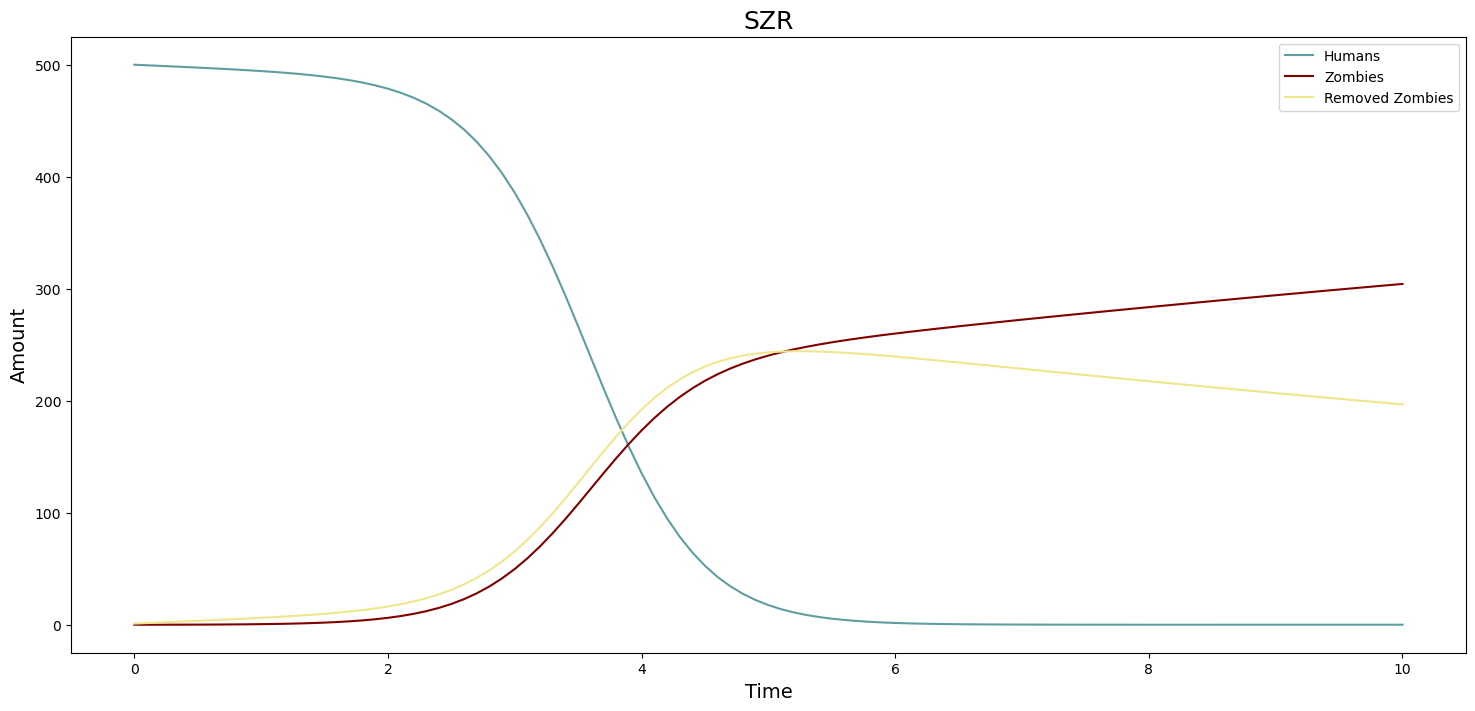

In [13]:
fig_2, ax_2 = plt.subplots(1,1, figsize=(18, 8))                      # Set up one plot across the page                               # Colours for plots
labels= ['Humans','Zombies','Removed Zombies']                        # Labels for the plot

for i in range(3):                                                    # Loop over S,I, and R
    ax_2.plot(T2,Y2[:,i], color = scheme[i], markersize ='1' , label = labels[i])   # Plot S,Z, and R against time.
    
ax_2.set_xlabel('Time', fontsize = '14')                              # Label the x-axis
ax_2.set_ylabel('Amount',fontsize = '14')                             # Label the y-axis                                        
ax_2.set_title("SZR",fontsize = '18')                                 # Plot title
ax_2.legend = plt.legend(loc ='upper right',  fontsize='medium')      # Add the legend
plt.show()                                                            # Show plot

# Task 4
[5 marks]

A more general SEZR zombie model adds an extra category, $E(t)$, to represent humans who have been infected but not yet converted into zombies.
This SEZR zombie outbreak model takes the form 
\begin{eqnarray*}
\frac{dS}{dt}&=&  -\beta SZ -\delta S \\
\frac{dE}{dt}&=&  \beta SZ -\zeta E \\
\frac{dZ}{dt} &=& \zeta E  - \alpha SZ \\
\frac{dR}{dt} &=& \alpha SZ + \delta S. \\
\end{eqnarray*}


A group of dedicated quantitative epidemiologists studied the movie '*Night of the Living Dead*' and counted the zombie level at various time points. The cell below gives the data: here we have 9 time points and 9 corresponding values for $Z$.
Based on these observations, the researchers estimated that the most appropriate values for the parameters in the SEZR model for this zombie outbreak are $\alpha = 0.0342$, $\beta = 0.0445$, $\zeta = 4.63$ and $\delta = 0.0001$.

Suppose that the initial condtions are $S(t=0) = 178.5$, $E(t=0) = 0$, $Z(t=0) = 1$, $R(t=0) = 0$.

Solve this ODE with RK3 using a stepsize of $0.1$ for $0 \le t \le 10$, and (a) plot the solution components; (b) superimpose the observed zombie data on the same plot; 
(c) find the first timepoint in your numerical solution at which the human population dips below half of its original level.

In [14]:
#Zombie observation data
t_values = np.array([0,1,1.5,3,4.5,5,5.75,5.9,10])
Z_values = np.array([1,1,3,8,10,20,28,30,40])

In [15]:
def SEZR_model (t, y, par):
    '''
    -Input-
    t: Array of timesteps to be iterated over.
    y: Array containing  [S,E,Z,R] in that order.
    par: Array containing [alpha, beta, zeta, delta] in that order.
    -Output-
    Array containing [dS_dt, dE_dt, dZ_dt, dR_dt] calculated based on 'y'. 
    '''
    [alpha, beta, zeta, delta] = par                  # Define alpha, beta, zeta, and delta
    [S,E,Z,R] = y                                     # Refer to values in 'y' by S,E,Z, and R
     
    dS_dt = -beta*S*Z - delta*S                       # Calculate dS_dt
    dE_dt = beta*S*Z- zeta*E                          # Calculate dE_dt
    dZ_dt = zeta*E - alpha*S*Z                        # Calculate dZ_dt
    dR_dt = alpha*S*Z + delta*S                       # Calculate dR_dt
    
    return np.array([dS_dt, dE_dt, dZ_dt, dR_dt])

In [16]:
T3 = T2                                       # Times are the same as T2
iv3 = np.array([178.5, 0, 1, 0])              # Array containing initial vales for S,E,Z, and R
par3 = [0.0342, 0.0445, 4.63, 0.0001]         # Array with values for alpha, beta, zeta, and delta
Y3 = Runge_Kutta_3(SEZR_model,T3, iv3, par3)  # Use Runge Kutta 3 and call the SEZR_model function with T3,iv3, and par3
assert(sum_check(Y3))                         # Check that S+E+Z+R is constant

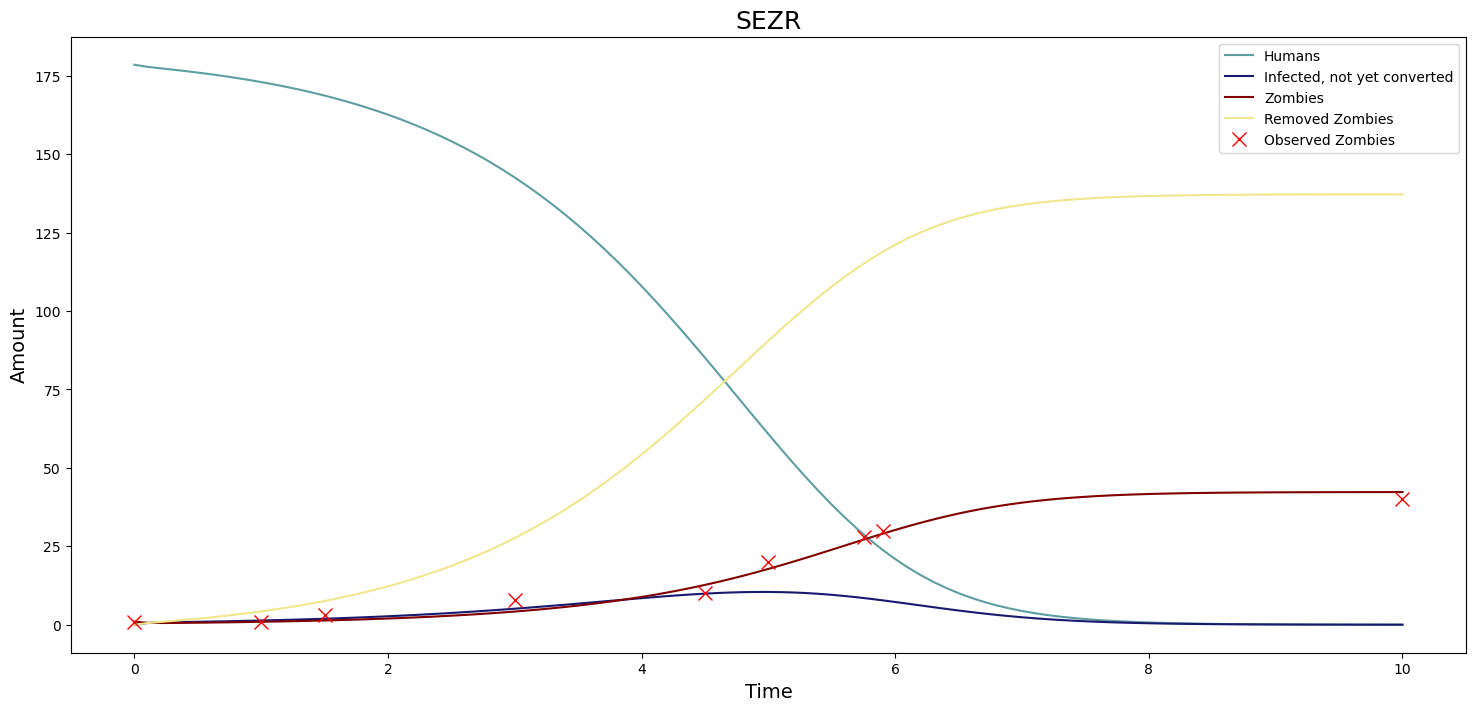

In [17]:
fig_3, ax_3 = plt.subplots(1,1, figsize=(18, 8))                              # Set up one plot across the page
scheme.insert(1, 'midnightblue')                                              # Add another colour to the colour scheme
labels= ['Humans','Infected, not yet converted','Zombies','Removed Zombies']  # Labels for the plot

for i in range(4):                                                                 # Loop over S, E, Z, and R.
    ax_3.plot(T3,Y3[:,i], color = scheme[i], markersize ='1' , label = labels[i])  # Plot S, E, Z, and R against time.
    
ax_3.plot(t_values, Z_values, 'rx', markersize='10',  label = "Observed Zombies")  # Plot observed zombies with red 'X's.
    
ax_3.set_xlabel('Time', fontsize = '14')                              # Label the x-axis
ax_3.set_ylabel('Amount',fontsize = '14')                             # Label the y-axis                                        
ax_3.set_title("SEZR",fontsize = '18')                                # Plot title
ax_3.legend = plt.legend(loc ='upper right',  fontsize='medium')      # Add the legend
plt.show()                                                            # Show plot


In [18]:
half = iv3[0]/2           # Half of the initial human population
i= 1;                     # Index counter
while(Y3[i,0]>=half):     # If the number of humans at timestep 'i' is above half the initial population...
    i = i+1;              # ...increase 'i' by 1. 
    
print(f'The human population dips below half of its original level at time {i/10}.') # i/10: Convert timestep to time

The human population dips below half of its original level at time 4.5.
